# opening a file


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\ABHI\Documents\abhishek_project\haberman.csv")


##### summarising the data

In [3]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Number of people who survived 

more than 5 years after surgery(status 1) 

and those who survived less than 5 years after surgery(status 2).

In [4]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# percentile

In [5]:
np.percentile(df['status'], np.arange(0, 100, 25))

array([1., 1., 1., 2.])

In [6]:
np.percentile(df['status'], 73)

1.0

# conclusion
## the percentage of successul treatment for breast cancer is around 73

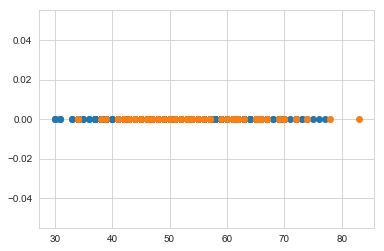

In [19]:
status1 = df[df['status'] == 1]
status2 = df[df['status'] == 2]

plt.plot(status1['age'], np.zeros_like(status1['nodes']), 'o')
plt.plot(status2['age'], np.zeros_like(status2['nodes']), 'o')

### no clear conclusion can be drawn from the above plot
### but we can say that the survival rate is more if the age is around between 30 and 38
### to prove it we will do the following

In [8]:
df[(df['age'] >= 30) & (df['age'] <= 38) & (df['status'] == 1)].shape[0]

31

In [9]:
df[(df['age'] >= 30) & (df['age'] <= 38) & (df['status'] == 2)].shape[0]

3

#### So, if the age is between 30 and 38 the survival rate for more than 5 years 
#### after surgery is more than 91%


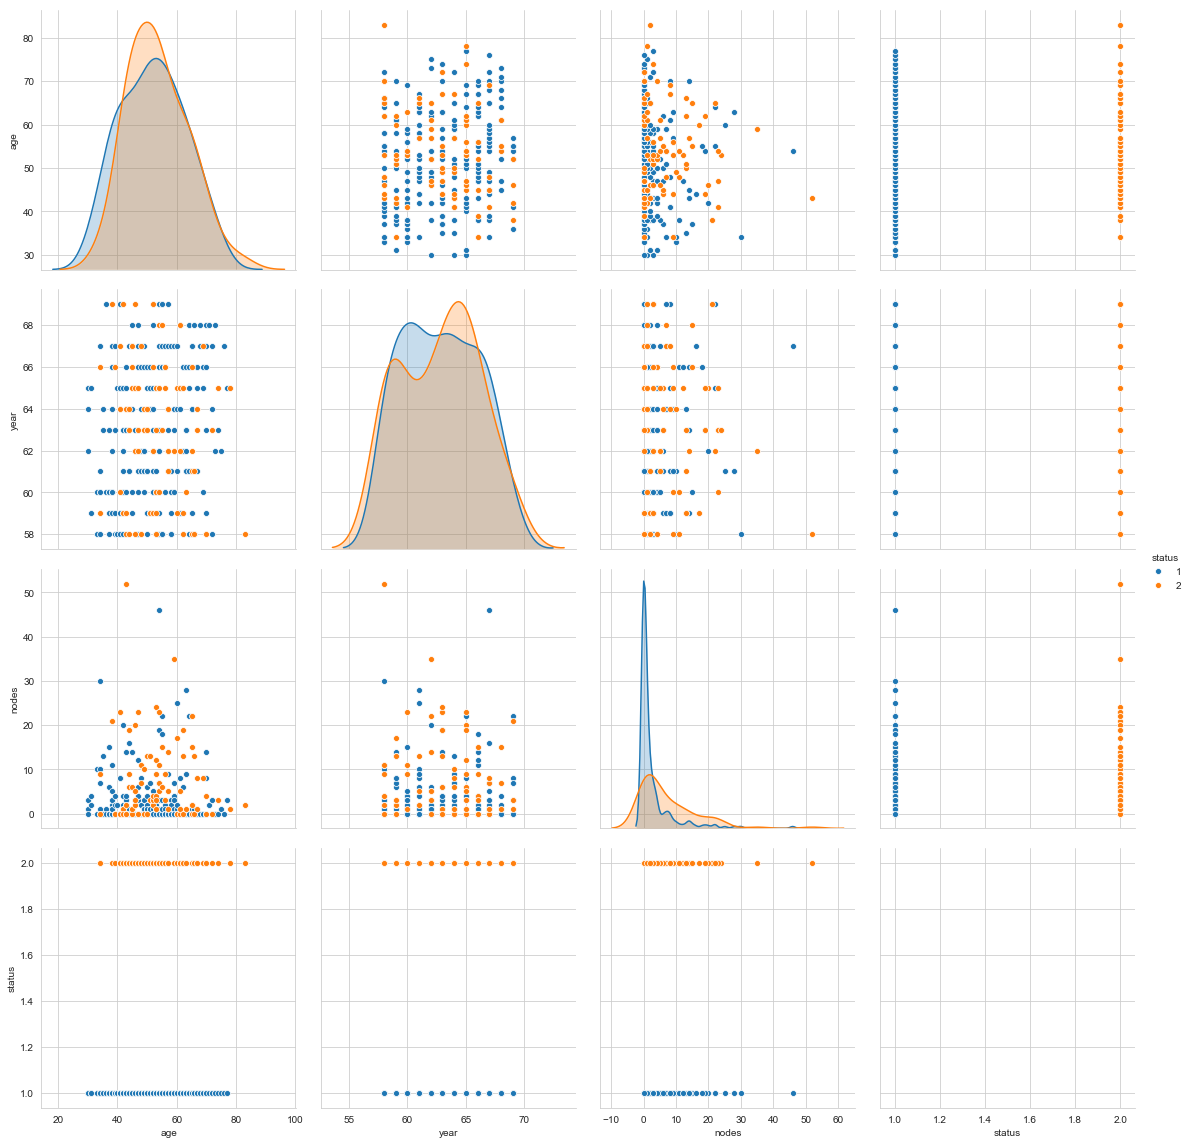

In [20]:
sns.set_style("whitegrid")
sns.pairplot(df, hue = "status", height = 4)
plt.show()

#### From the age vs status graph above we can state that if the age is less than or equal to 33 years,
#### the survival rate for patient is 100%
#### To prove it we will do the following


In [22]:
df[(df['age'] <= 33) & (df['status'] == 2)].shape[0]

0

#### Also from the age vs nodes graph, we can say that patient with age between 35 and 70 have chance to have
#### more number of nodes in their blood.

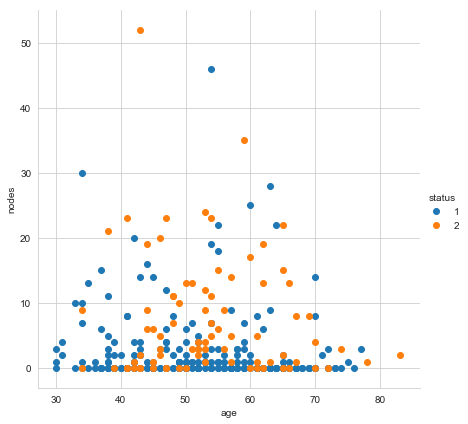

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status", height = 6)\
.map(plt.scatter, "age", "nodes")\
.add_legend()
plt.show()

#### Moreover if we look closely, leaving one outlier, the patient with age between 40 and 65 have chance to have more number 
#### of nodes in their blood

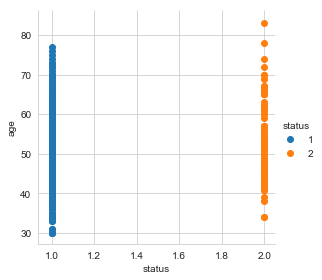

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status", height = 4)\
.map(plt.scatter, "status", "age")\
.add_legend()
plt.show()

In [14]:
df[(df['age'] >= 78) & (df['status'] == 2)].shape[0]

2

#### For the age above 78, we have two outlier that says the patient with age >= 78 does not 
#### survive for more than 5 years after surgery

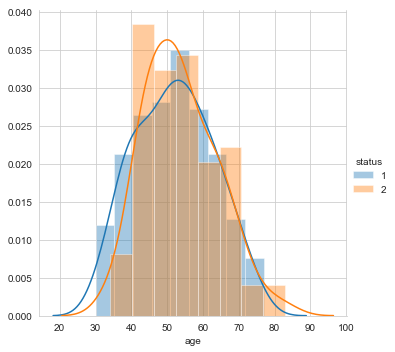

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status", height = 5)\
.map(sns.distplot, "age")\
.add_legend()
plt.show()

##### This histogram also shows that if the age is less than or equal to 33, there is 100% survival rate
##### and if the age is above 77, there is 0% survival rate.

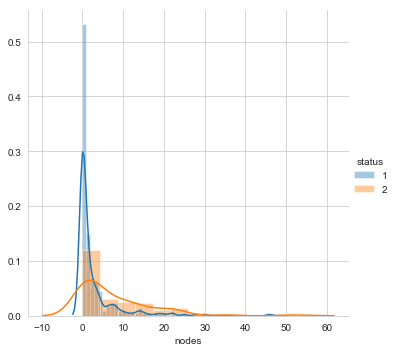

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status", height = 5)\
.map(sns.distplot, "nodes")\
.add_legend()

plt.show()

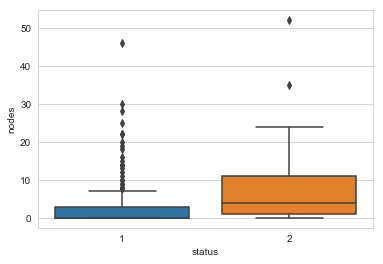

In [17]:
sns.boxplot(x = "status", y = "nodes", data = df)
plt.show()

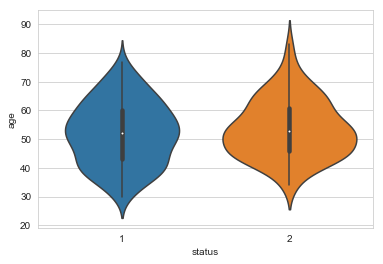

In [18]:
sns.violinplot(x = "status", y = "age", data = df)
plt.show()

In [33]:
k = df[df['nodes'] > 10]
k['status'].value_counts()

2    23
1    17
Name: status, dtype: int64

In [34]:
k = df[df['nodes'] < 10]
k['status'].value_counts()

1    206
2     57
Name: status, dtype: int64

#### So, there are low chances of survival rate if number of nodes is greater than 10.

In [64]:
df[(df['age'] >= 40) & (df['age'] <= 70) & (df['nodes'] >= 10) &(df['status'] == 1)].shape[0]

13

In [65]:
df[(df['age'] >= 40) & (df['age'] <= 70) & (df['nodes'] >= 10) &(df['status'] == 2)].shape[0]

23

In [53]:
df[(df['age'] >= 40) & (df['age'] <= 65) & (df['nodes'] < 10) &(df['status'] == 1)].shape[0]

150

In [54]:
df[(df['age'] >= 40) & (df['age'] <= 65) & (df['nodes'] < 10) &(df['status'] == 2)].shape[0]

44

In [55]:
df[(df['nodes'] >= 10) &(df['status'] == 1)].shape[0]

19

In [56]:
df[(df['nodes'] >= 10) &(df['status'] == 2)].shape[0]

24

In [57]:
df[(df['age'] >= 70) & (df['age'] <= 75) & (df['nodes'] >= 10) &(df['status'] == 1)].shape[0]

1

In [58]:
df[(df['age'] >= 70) & (df['age'] <= 75) & (df['nodes'] >= 10) &(df['status'] == 2)].shape[0]

0

#### if the number of nodes is 0, then there is high possibility of survival